In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [17]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

In [18]:
#columns to be dropped
dropped_columns = ['id','date','view','zipcode','sqft_living15','sqft_lot15']

In [19]:
dropping = [15856]
#15856 has 33 bedrooms, appears to be a mistake for the squarefootage allocated
#index will be different after dropping null values below

In [20]:
#df.loc[(df.lat <47.2) & (df.long > -121.8)]
# want to use longitudes less than -121.647

In [21]:
#plt.scatter(df.long,df.lat)

In [25]:
df = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning

## Dropping Unwanted Columns

In [26]:
df = df.drop(columns=dropped_columns)

In [28]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

In [33]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842
lat :  0
long :  0


In [36]:
df.waterfront.isna()

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [35]:
df.waterfront[0]

nan

In [37]:
df.yr_renovated.isna()

0        False
1        False
2         True
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: yr_renovated, Length: 21597, dtype: bool

In [39]:
df.yr_renovated[2]

nan

## filling NA with 0, converting these to categorical later if needed

In [43]:
df = df.fillna(0)

In [45]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0
lat :  0
long :  0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 2.5+ MB


In [50]:
df.loc[df.sqft_basement == '?']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,47.3097,-122.327
18,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,?,1921,0.0,47.3089,-122.210
42,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,?,2014,0.0,47.6848,-122.016
79,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,?,2002,0.0,47.3420,-122.025
112,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,?,1980,0.0,47.3624,-122.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,504600.0,5,3.00,2360,5000,1.0,0.0,3,7,1390,?,2008,0.0,47.6931,-122.330
21447,337500.0,4,2.50,2330,4907,2.0,0.0,3,7,2330,?,2013,0.0,47.3590,-122.081
21473,352500.0,2,2.50,980,1010,3.0,0.0,3,8,980,?,2008,0.0,47.6844,-122.387
21519,332000.0,4,2.50,2380,5737,2.0,0.0,3,7,2380,?,2010,0.0,47.2815,-122.356


In [51]:
df = df.replace(to_replace="?",value=0)

In [73]:
df.sqft_basement = df.sqft_basement.astype(float)

In [57]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [80]:
#handling the 33

In [83]:
df = df.drop(df.loc[df.bedrooms ==33].index)

# Exploring the Data

## Visualizations

In [86]:
len(df.columns)

15

In [87]:
sns.set_style("darkgrid")

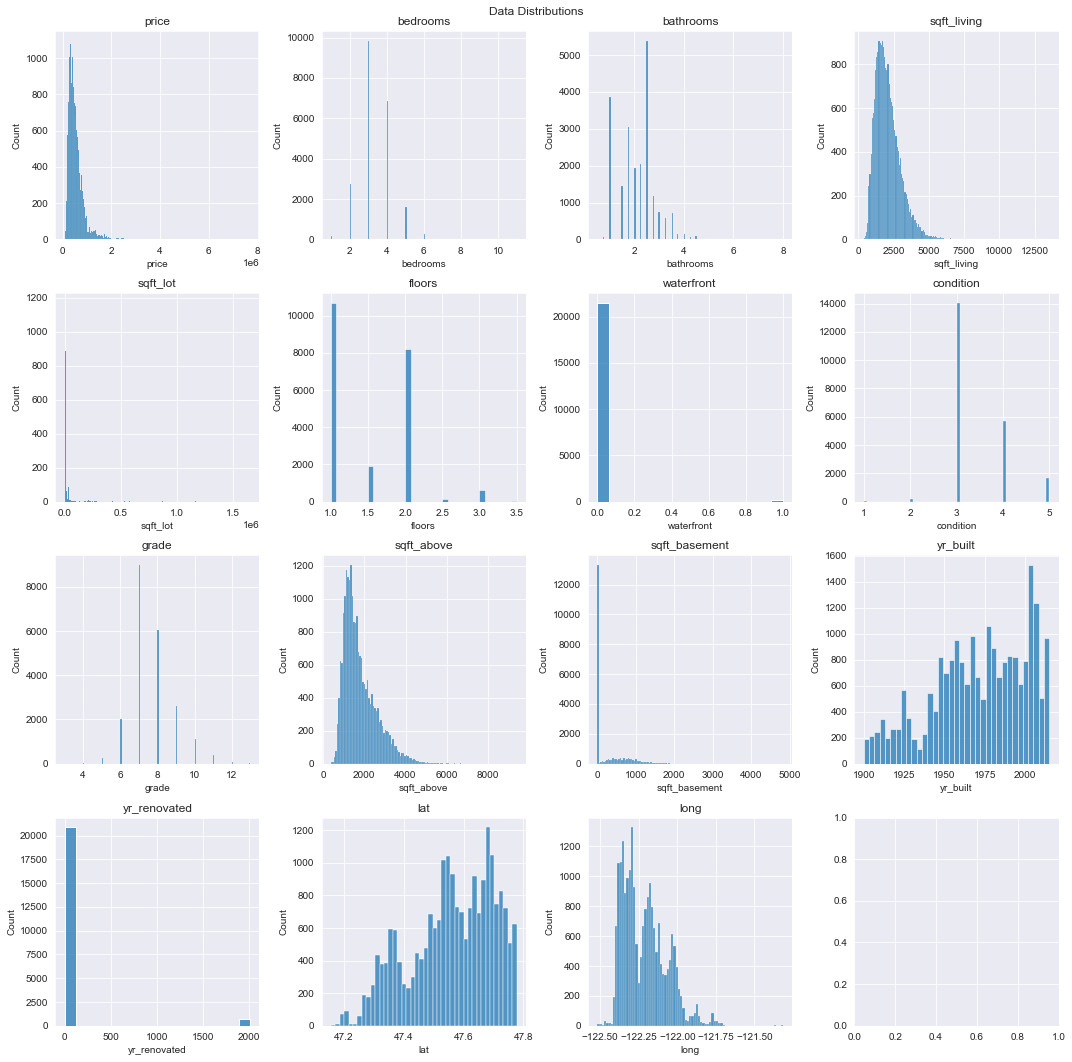

In [88]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

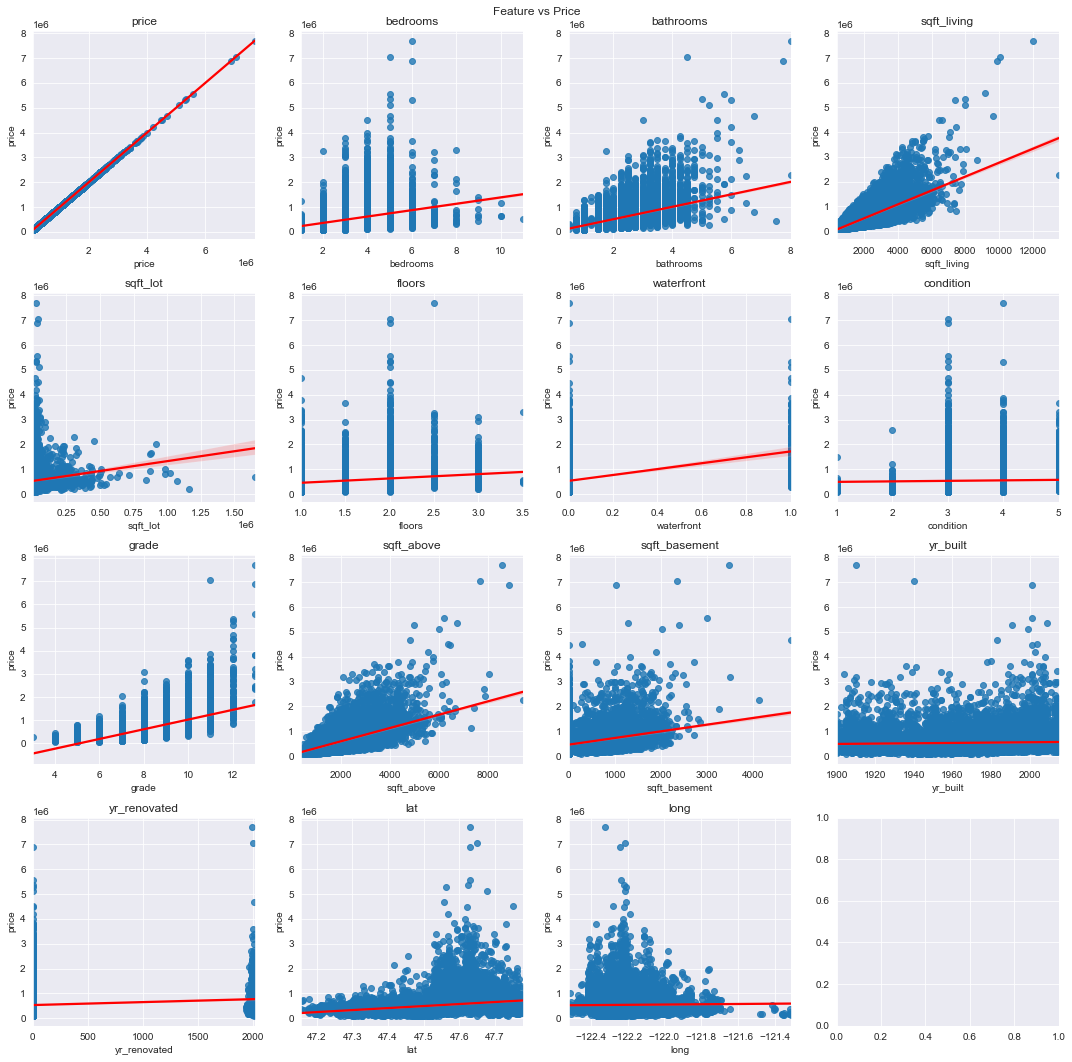

In [92]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='price', data=df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [93]:
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


# Findings HERE

# Generating / Modifying Features

## Price Per Square Foot (PSF) using sqft_above

## Living to Lot Sqft Ratio

## Basement to Categorical

## Waterfront to Categorical